In [64]:
from DataLoader import DataLoader
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import glob, cv2

In [2]:
videos_folder = "../../VCDB/dataset"
data_loader = DataLoader(videos_folder)
annotations_df = data_loader.create_annotation_df()

In [3]:
annotations_df.head()

,Video_A,Video_B,Copy_Start_Video_A,Copy_End_Video_A,Copy_Start_Video_B,Copy_End_Video_B
0,3504e360accbaccb1580befbb441f1019664c2bb.mp4,3504e360accbaccb1580befbb441f1019664c2bb.mp4,00:00:00,00:00:09,00:00:00,00:00:09
1,3504e360accbaccb1580befbb441f1019664c2bb.mp4,37b31d607d31a47d347b15dae2b8aa63e57861eb.flv,00:00:03,00:00:05,00:00:33,00:00:35
2,3504e360accbaccb1580befbb441f1019664c2bb.mp4,37b31d607d31a47d347b15dae2b8aa63e57861eb.flv,00:00:03,00:00:05,00:00:41,00:00:45
3,3504e360accbaccb1580befbb441f1019664c2bb.mp4,458db5aa227ae49ceb8bc1bed5f9cf5b4bed63f2.flv,00:00:00,00:00:07,00:00:05,00:00:12
4,3504e360accbaccb1580befbb441f1019664c2bb.mp4,5c5714c0a56fd2a96f99db2f59b0d03659d77cdf.flv,00:00:00,00:00:04,00:00:06,00:00:10


In [4]:
annotations_df["Video_Pairs"] = list(zip(annotations_df["Video_A"], annotations_df["Video_B"]))

In [5]:
list(annotations_df["Video_Pairs"])[0]

('3504e360accbaccb1580befbb441f1019664c2bb.mp4',
 '3504e360accbaccb1580befbb441f1019664c2bb.mp4')

In [6]:
print(f"Total number of video copy pairs: {annotations_df.shape[0]}")

Total number of video copy pairs: 9236


In [7]:
annotations_df['Copy_Start_Video_A'] = pd.to_datetime(
                          annotations_df['Copy_Start_Video_A'],
                          format='%H:%M:%S'
)
annotations_df['Copy_End_Video_A'] = pd.to_datetime(
                          annotations_df['Copy_End_Video_A'],
                          format='%H:%M:%S'
)
annotations_df['Copy_Start_Video_B'] = pd.to_datetime(
                          annotations_df['Copy_Start_Video_B'],
                          format='%H:%M:%S'
)
annotations_df['Copy_End_Video_B'] = pd.to_datetime(
                          annotations_df['Copy_End_Video_B'],
                          format='%H:%M:%S'
)

In [8]:
annotations_df.head()

,Video_A,Video_B,Copy_Start_Video_A,Copy_End_Video_A,Copy_Start_Video_B,Copy_End_Video_B,Video_Pairs
0,3504e360accbaccb1580befbb441f1019664c2bb.mp4,3504e360accbaccb1580befbb441f1019664c2bb.mp4,1900-01-01 00:00:00,1900-01-01 00:00:09,1900-01-01 00:00:00,1900-01-01 00:00:09,"(3504e360accbaccb1580befbb441f1019664c2bb.mp4,..."
1,3504e360accbaccb1580befbb441f1019664c2bb.mp4,37b31d607d31a47d347b15dae2b8aa63e57861eb.flv,1900-01-01 00:00:03,1900-01-01 00:00:05,1900-01-01 00:00:33,1900-01-01 00:00:35,"(3504e360accbaccb1580befbb441f1019664c2bb.mp4,..."
2,3504e360accbaccb1580befbb441f1019664c2bb.mp4,37b31d607d31a47d347b15dae2b8aa63e57861eb.flv,1900-01-01 00:00:03,1900-01-01 00:00:05,1900-01-01 00:00:41,1900-01-01 00:00:45,"(3504e360accbaccb1580befbb441f1019664c2bb.mp4,..."
3,3504e360accbaccb1580befbb441f1019664c2bb.mp4,458db5aa227ae49ceb8bc1bed5f9cf5b4bed63f2.flv,1900-01-01 00:00:00,1900-01-01 00:00:07,1900-01-01 00:00:05,1900-01-01 00:00:12,"(3504e360accbaccb1580befbb441f1019664c2bb.mp4,..."
4,3504e360accbaccb1580befbb441f1019664c2bb.mp4,5c5714c0a56fd2a96f99db2f59b0d03659d77cdf.flv,1900-01-01 00:00:00,1900-01-01 00:00:04,1900-01-01 00:00:06,1900-01-01 00:00:10,"(3504e360accbaccb1580befbb441f1019664c2bb.mp4,..."


In [9]:
annotations_df["copy_time_interval_A"] = (annotations_df["Copy_End_Video_A"] - annotations_df["Copy_Start_Video_A"]).astype('timedelta64[s]')
annotations_df["copy_time_interval_B"] = (annotations_df["Copy_End_Video_B"] - annotations_df["Copy_Start_Video_B"]).astype('timedelta64[s]')

In [10]:
annotations_df["copy_time_interval_A"]

0       9.0
1       2.0
2       2.0
3       7.0
4       4.0
       ... 
202    16.0
203     5.0
204    75.0
205     5.0
206     5.0
Name: copy_time_interval_A, Length: 9236, dtype: float64

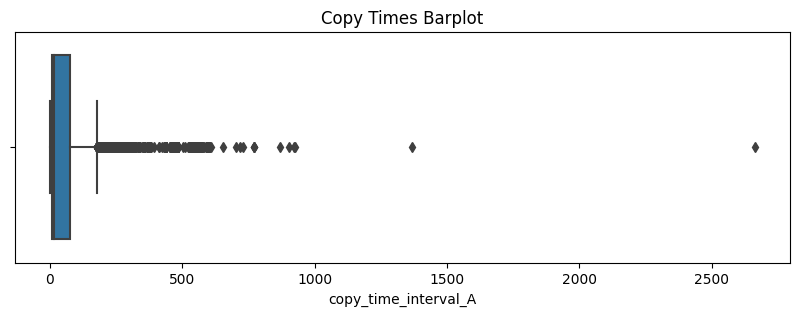

In [48]:
plt.rcParams["figure.figsize"] = (10, 3)
sns.boxplot(x=annotations_df["copy_time_interval_A"]).set_title('Copy Times Barplot')
plt.show()

In [11]:
annotations_df["copy_time_interval_A"].mean()

63.051537462104804

In [12]:
annotations_df["copy_time_interval_A"].min()

1.0

In [13]:
annotations_df["copy_time_interval_A"].max()

2662.0

In [14]:
annotations_df["copy_time_interval_B"].mean()

64.03551320918146

In [15]:
annotations_df["copy_time_interval_B"].min()

1.0

In [16]:
annotations_df["copy_time_interval_B"].max()

2662.0

In [15]:
import numpy as np

In [26]:
bins = np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 3000])
hist = np.histogram(np.array(annotations_df["copy_time_interval_A"]), bins)[0]

In [34]:
bins = ["0-60", "60-120","120-180","180-240","240-300","300-360","360-420","420-480","480-540","540-600","600-3000"]

In [35]:
hist

array([6512,  957, 1001,  279,  201,   53,   16,   52,   45,   96,   24])

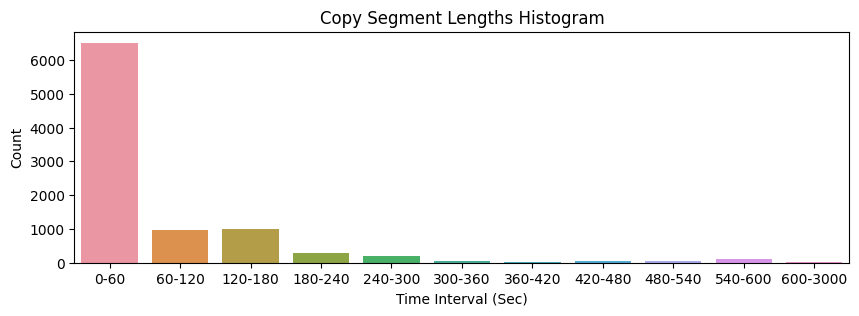

In [44]:
plt.rcParams["figure.figsize"] = (10, 3)
ax = sns.barplot(x=bins, y=hist).set_title('Copy Segment Lengths Histogram')
plt.xlabel("Time Interval (Sec)")
plt.ylabel("Count")
plt.show()

In [55]:
annotation_files = data_loader.get_video_categories()

In [57]:
video_category_folders = [file.replace("annotation", "core_dataset").replace(".txt", "") for file in annotation_files]

In [60]:
all_video_files = []

for folder in video_category_folders:
    video_files = glob.glob(folder + "/*")
    all_video_files += video_files

In [62]:
len(all_video_files)

528

In [63]:
all_video_files[0]

'../../VCDB/dataset/core_dataset/baggio_penalty_1994/3504e360accbaccb1580befbb441f1019664c2bb.mp4'

In [65]:
duration_arr = []
fps_arr = []

for video_file_path in all_video_files:
    cap = cv2.VideoCapture(video_file_path)
    if not cap.isOpened():
        if ".mp4" in video_file_path:
            video_file_path = video_file_path.replace(".mp4", ".flv")
            cap = cv2.VideoCapture(video_file_path)
        elif ".flv" in video_file_path:
            video_file_path = video_file_path.replace(".flv", ".mp4")
            cap = cv2.VideoCapture(video_file_path)
        else:
            raise RuntimeError(f"Video {video_file_path} not readable.")
            
    fps = cap.get(cv2.CAP_PROP_FPS)
    fps_arr.append(fps)
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    video_duration_secs = round(total_frames / fps)
    duration_arr.append(video_duration_secs)

[flv @ 0xa3e1540] Missing AMF_END_OF_OBJECT in AMF_DATA_TYPE_MIXEDARRAY, found 0


In [69]:
sum(duration_arr) / len(duration_arr)

183.61742424242425

In [71]:
max(duration_arr), min(duration_arr)

(2662, 3)

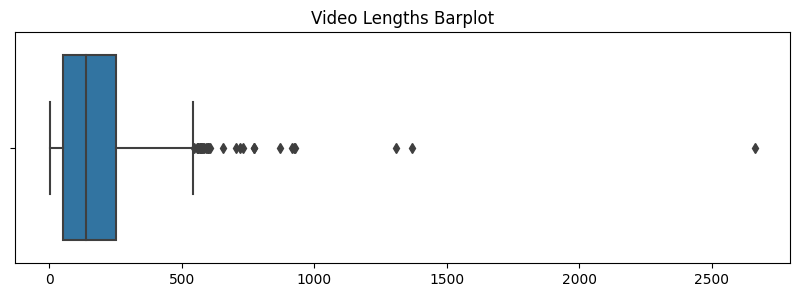

In [74]:
plt.rcParams["figure.figsize"] = (10, 3)
sns.boxplot(x=duration_arr).set_title('Video Lengths Barplot')
plt.show()

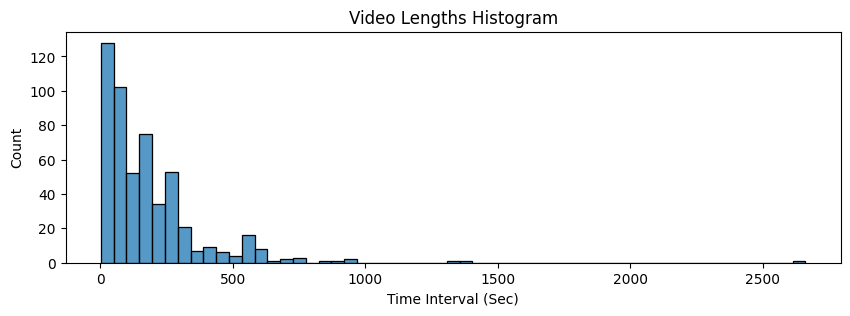

In [80]:
plt.rcParams["figure.figsize"] = (10, 3)
ax = sns.histplot(duration_arr).set_title('Video Lengths Histogram')
plt.xlabel("Time Interval (Sec)")
plt.ylabel("Count")
plt.show()

In [72]:
sum(fps_arr) / len(fps_arr)

26.8932747177066

In [73]:
max(fps_arr), min(fps_arr)

(30.0, 6.0)

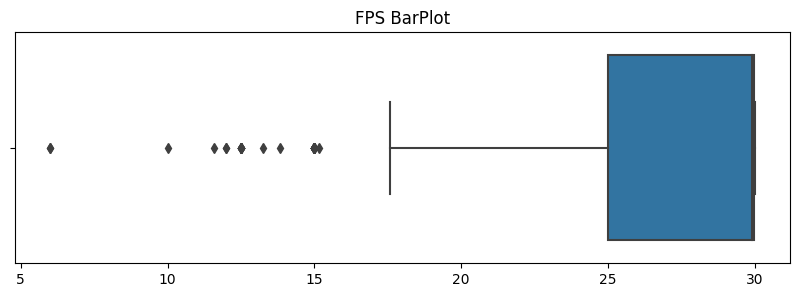

In [77]:
plt.rcParams["figure.figsize"] = (10, 3)
sns.boxplot(x=fps_arr).set_title('FPS BarPlot')
plt.show()

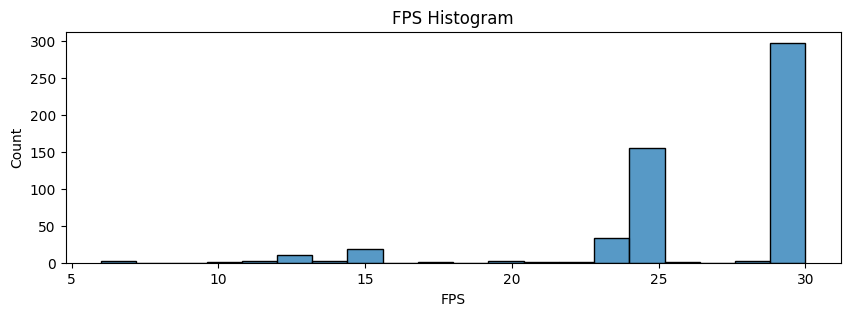

In [87]:
plt.rcParams["figure.figsize"] = (10, 3)
ax = sns.histplot(fps_arr).set_title('FPS Histogram')
plt.xlabel("FPS")
plt.ylabel("Count")
plt.show()

In [102]:
video_counts = {}

for folder in video_category_folders:
    video_files = glob.glob(folder + "/*")
    video_counts[folder.split("/")[-1]] = len(video_files)

In [103]:
video_counts = sorted(video_counts.items(), key=lambda x:x[1], reverse=True)

In [106]:
video = []
count = []

for x in video_counts:
    video.append(x[0])
    count.append(x[1])

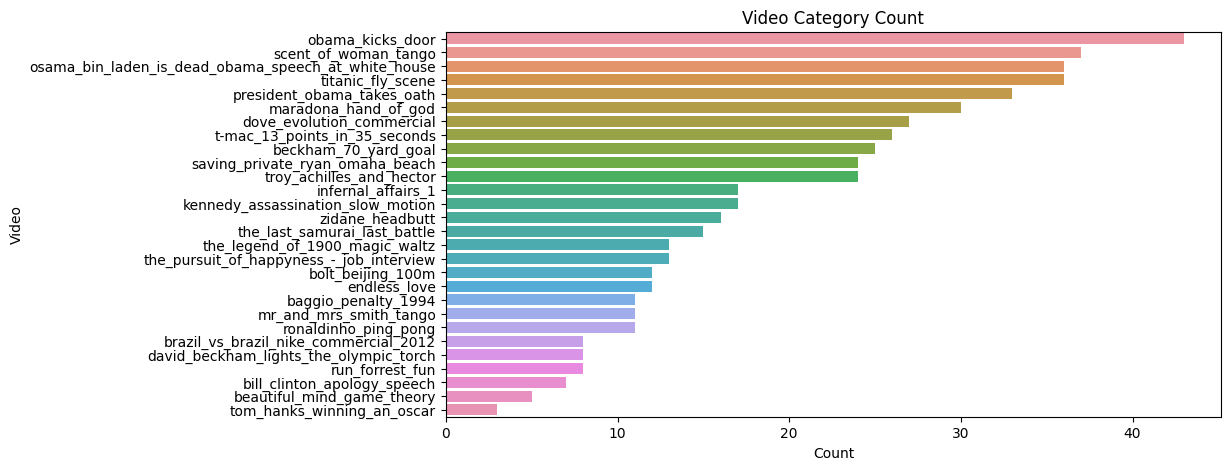

In [112]:
plt.rcParams["figure.figsize"] = (10, 5)
ax = sns.barplot(x=count, y=video).set_title('Video Category Count')
plt.xlabel("Count")
plt.ylabel("Video")
plt.show()

In [113]:
import json

In [115]:
annotations_file = "../../FIVR-200K/dataset/annotation.json"

In [116]:
with open(annotations_file, 'r') as file:
    annotations = json.load(file)

In [118]:
ND = []
DS = []
CS = []
IS = []
DA = []

In [119]:
for query in annotations:
    if "ND" in annotations[query]:
        ND += annotations[query]["ND"]
    if "DS" in annotations[query]:
        DS += annotations[query]["DS"]
    if "CS" in annotations[query]:
        CS += annotations[query]["CS"]
    if "IS" in annotations[query]:
        IS += annotations[query]["IS"]
    if "DA" in annotations[query]:
        DA += annotations[query]["DA"]

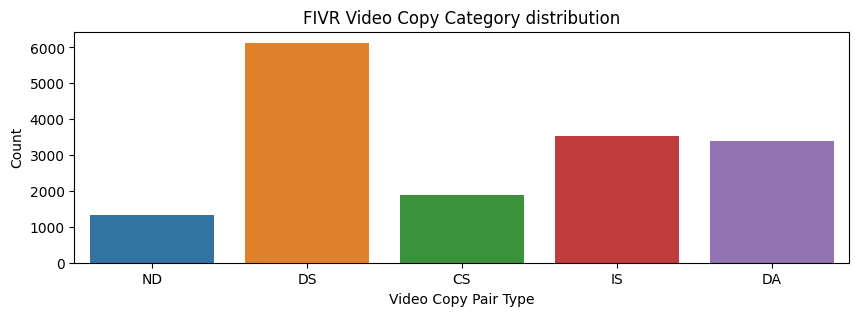

In [121]:
plt.rcParams["figure.figsize"] = (10, 3)
ax = sns.barplot(x=["ND", "DS", "CS", "IS", "DA"], y=[len(ND), len(DS), len(CS), len(IS), len(DA)]).set_title('FIVR Video Copy Category distribution')
plt.xlabel("Video Copy Pair Type")
plt.ylabel("Count")
plt.show()

In [124]:
len(ND) / (len(ND) + len(DS) + len(CS) + len(IS) + len(DA))

0.08146326467875807

In [125]:
len(ND)

1325

In [138]:
nd_file = "../../FIVR-200K/dataset/FullCS.json"
with open(nd_file, 'r') as file:
    annotations = json.load(file)

In [139]:
total = 0
for vids in annotations:
    total += len(annotations[vids])

In [140]:
total

59